In [1]:
leeftijd = c(1.6,6.8,5.1,7.2,3.5,6.2,9.4,5.5,8,2.7)
kosten = c(450,930,670,920,640,900,1440,760,1260,530)

In [2]:
SXi = 56
SYi = 8500
SXi2 = 367.24
SYi2 = 8102000
SXiYi = 54132

In [3]:
fit = lm(kosten~leeftijd)

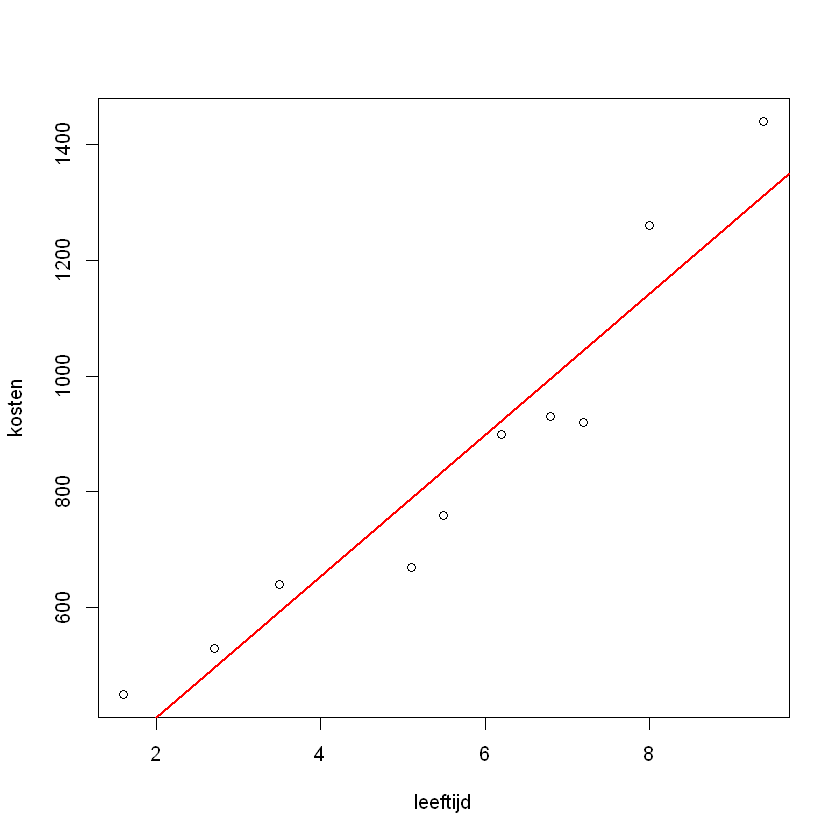

In [4]:
plot(leeftijd, kosten)
abline(fit, col='red', lw=2)

In [6]:
summary(fit)


Call:
lm(formula = kosten ~ leeftijd)

Residuals:
     Min       1Q   Median       3Q      Max 
-124.840  -74.899    5.041   76.756  127.256 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   168.06      83.55   2.012   0.0791 .  
leeftijd      121.77      13.79   8.833 2.13e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 101 on 8 degrees of freedom
Multiple R-squared:  0.907,	Adjusted R-squared:  0.8954 
F-statistic: 78.02 on 1 and 8 DF,  p-value: 2.127e-05


In [59]:
fit$coefficients

(Intercept)    leeftijd 
   168.0611    121.7748

We kunnen $R^2$ op de volgende manier bepalen:

$$ R^2 = 1 - \dfrac{SS_{res}}{SS_{tot}} $$

Waarbij geldt dat $SS_{res}$ en $SS_{tot}$ op de volgende manier kunnen worden bepaald:

1. $ SS_{tot} = \sum(y_i - \bar{y})^2 $
2. $ SS_{res} = \sum(y_i - f_i)^2 = \sum e^2_i $

Eerste bepalen we de kwadratensom voor de $y_i$ waarden.

In [13]:
SStot = sum((kosten - mean(kosten))^2)
SStot

[1] 877000

Vervolgens de kwadratensom voor de residueen, die we kunnen vinden met `fit$residuals`:

In [16]:
SSres = sum(fit$residuals^2)
SSres

[1] 81567.04

Nu kunnen we $R^2$ bepalen:

In [22]:
R2 = 1 - SSres / SStot
R2

[1] 0.9069931

Hieruit kunnen we zien dat $\sum e^2$ gelijk is aan $\sum (y_i - \bar{y})^2 \cdot (1- R^2)$.

In [28]:
SSres; SStot * (1 - R2)

[1] 81567.04

[1] 81567.04

Het aantal vrijheidsgraden is $n-df$:

In [29]:
length(kosten) - 2

[1] 8

Er zijn in totaal 10 waarnemingen en er zijn twee variabelen.

Nu kunnen we de geschatte standaardafwijking vinden met:

$$ s_\epsilon = \sqrt{\dfrac{\sum e_i^2}{n-2}} = \sqrt{\dfrac{SS_{res}}{n-2}} $$

In [31]:
SE = sqrt(SSres / 8)
SE

[1] 100.9746

Nu gaan we de standaardafwijking van de voorspelling, $s_f$ voor $X_0=10$ bepalen. Hierbij gebruiken we:

$$ s_f = s_\epsilon \sqrt{1 + \dfrac{1}{n} + \dfrac{(X_0 - \bar{X})^2}{\sum(X_i - \bar{X})^2} } $$

In [32]:
X0 = 10

In [46]:
sf = SE * sqrt(1 + 1 / length(kosten) + (X0 - mean(leeftijd))^2 / sum((leeftijd - mean(leeftijd))^2))
sf

[1] 122.0468

In [42]:
alpha = 0.05

In [44]:
t = qt(alpha/2, length(leeftijd) - 2)
t = abs(t)
t

[1] 2.306004

In [62]:
Yc = fit$coefficients[2] * X0 + fit$coefficients[1]
Yc

leeftijd 
1385.809

In [58]:
interval = c(Yc - t * sf, Yc + t * sf)
interval

leeftijd leeftijd 
1104.369 1667.249

Dit is een betrouwbaarheidsinterval voor de onderhoudskosten.